**Gridworld**

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random

In [241]:
class Gridworld():
    def __init__(self, step_cost=-0.0, max_ep_length=400, es=True):
        self.grid = np.zeros((3,4))
        self.grid[0][3] = 1 
        self.grid[1][3] = -1 
        self.grid[1][1] = 2
        self.exploring_starts = es
        self.goal_state = 3
        self.death_state = 7
        self.state = 8
        self.done = False
        self.max_ep_length=max_ep_length
        self.steps = 0
        self.step_cost = step_cost
        self.possible_actions = [0,1,2,3] # 0 = up, 1 = right, 2 = down, 3 = left
        self.action_space = 4
        self.coord_state_translation = {"[0, 0]":0, "[0, 1]":1, "[0, 2]":2, "[0, 3]":3,
                           "[1, 0]":4, "[1, 1]":5, "[1, 2]":6, "[1, 3]":7,
                           "[2, 0]":8, "[2, 1]":9, "[2, 2]":10, "[2, 3]":11}
        self.state_coord_translation = {"0":[0, 0], "1":[0, 1], "2":[0, 2], "3":[0, 3],
                           "4":[1, 0], "5":[1, 1], "6":[1, 2], "7":[1, 3],
                           "8":[2, 0], "9":[2, 1], "10":[2, 2], "11":[2, 3]}
    
    def reset(self):
        self.done = False
        self.steps = 0
        self.grid = np.zeros((3,4))
        self.grid[0][3] = 1 
        self.grid[1][3] = -1 
        self.grid[1][1] = 2 
        if self.exploring_starts:
            self.state = np.random.choice([0,1,2,4,6,8,9,10,11])
        else:
            self.state = 8
        return self.state
    
    def get_next_state(self, current_position, action):
        
        next_state = self.state_coord_translation[str(current_position)].copy() 
        if action == 0 and next_state[0] != 0 and next_state != [2, 1]:
            next_state[0] -= 1
        elif action == 1 and next_state[1] != 3 and next_state != [1, 0]:
            next_state[1] += 1
        elif action == 2 and next_state[0] != 2 and next_state != [0, 1]:
            next_state[0] += 1
        elif action == 3 and next_state[1] != 0 and next_state != [1, 2]:
            next_state[1] -= 1
        else:
            pass

        return self.coord_state_translation[str(next_state)]
            
    def step(self, action):
        assert action in self.possible_actions, "Action not in action space!"
        current_position = self.state
        next_state = self.get_next_state(current_position, action)        
        self.steps += 1
        
        if next_state == self.goal_state:
            reward = 1
            self.done = True
            
        elif next_state == self.death_state:
            reward = -1
            self.done = True
        else:
            reward = self.step_cost
        
        if self.steps == self.max_ep_length:
            self.done = True
            
        self.state = next_state
        return next_state, reward, self.done
    
def plot_state_value_grid(state_value_grid):
    plt.figure(figsize=(10,5))
    p=sns.heatmap(state_value_grid, cmap='coolwarm', annot=True, fmt=".1f",annot_kws={'size':16},square=True)
    p.set_ylim(len(state_value_grid)+0.01, -0.01)  
    
def plot_action_value(action_value_grid):
    top=action_value_grid[:,0].reshape((3,4))
    top_value_positions = [(0.38,0.25),(1.38,0.25),(2.38,0.25),(3.38,0.25),
                           (0.38,1.25),(1.38,1.25),(2.38,1.25),(3.38,1.25),
                           (0.38,2.25),(1.38,2.25),(2.38,2.25),(3.38,2.25)]
    right=action_value_grid[:,1].reshape((3,4))
    right_value_positions = [(0.65,0.5),(1.65,0.5),(2.65,0.5),(3.65,0.5),
                           (0.65,1.5),(1.65,1.5),(2.65,1.5),(3.65,1.5),
                           (0.65,2.5),(1.65,2.5),(2.65,2.5),(3.65,2.5)]
    bottom=action_value_grid[:,2].reshape((3,4))
    bottom_value_positions = [(0.38,0.8),(1.38,0.8),(2.38,0.8),(3.38,0.8),
                           (0.38,1.8),(1.38,1.8),(2.38,1.8),(3.38,1.8),
                           (0.38,2.8),(1.38,2.8),(2.38,2.8),(3.38,2.8)]
    left=action_value_grid[:,3].reshape((3,4))
    left_value_positions = [(0.05,0.5),(1.05,0.5),(2.05,0.5),(3.05,0.5),
                           (0.05,1.5),(1.05,1.5),(2.05,1.5),(3.05,1.5),
                           (0.05,2.5),(1.05,2.5),(2.05,2.5),(3.05,2.5)]


    fig, ax=plt.subplots(figsize=(12,5))
    ax.set_ylim(3, 0)
    tripcolor = quatromatrix(left, top, right, bottom, ax=ax,
                 triplotkw={"color":"k", "lw":1},
                 tripcolorkw={"cmap": "coolwarm"}) 

    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor)

    for i, (xi,yi) in enumerate(top_value_positions):
        plt.text(xi,yi,round(top.flatten()[i],2), size=11, color="w")
    for i, (xi,yi) in enumerate(right_value_positions):
        plt.text(xi,yi,round(right.flatten()[i],2), size=11, color="w")
    for i, (xi,yi) in enumerate(left_value_positions):
        plt.text(xi,yi,round(left.flatten()[i],2), size=11, color="w")
    for i, (xi,yi) in enumerate(bottom_value_positions):
        plt.text(xi,yi,round(bottom.flatten()[i],2), size=11, color="w")

    plt.show()
    
    
def quatromatrix(left, bottom, right, top, ax=None, triplotkw={},tripcolorkw={}):
    if not ax: ax=plt.gca()
    n = left.shape[0]; m=left.shape[1]
    a = np.array([[0,0],[0,1],[.5,.5],[1,0],[1,1]])
    tr = np.array([[0,1,2], [0,2,3],[2,3,4],[1,2,4]])

    A = np.zeros((n*m*5,2))
    Tr = np.zeros((n*m*4,3))

    for i in range(n):
        for j in range(m):
            k = i*m+j
            A[k*5:(k+1)*5,:] = np.c_[a[:,0]+j, a[:,1]+i]
            Tr[k*4:(k+1)*4,:] = tr + k*5

    C = np.c_[ left.flatten(), bottom.flatten(), 
              right.flatten(), top.flatten()   ].flatten()

    triplot = ax.triplot(A[:,0], A[:,1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:,0], A[:,1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor

In [242]:
max_episodes = 1000
env = Gridworld(step_cost=-0.0,max_ep_length=30)
action_value_grid = np.zeros((12,4))
action_value_grid[3] = 1 
action_value_grid[7] = -1 
g = 0.99 
alpha = 0.01 

In [243]:
def get_action(q_values, epsilon):
    if random.random() > epsilon:
        return np.argmax(q_values)
    else:
        return random.randint(0,3)

In [244]:
for ep in range(max_episodes):
    iterator = 1
    state = env.reset()
    while True: 
        action = get_action(action_value_grid[state], 1*0.95**iterator)
        next_state, reward, done = env.step(action)
        action_value_grid[state][action] += alpha*(reward + g*max(action_value_grid[next_state]) - action_value_grid[state][action])
        iterator += 1
        state = next_state
        if done:
            break

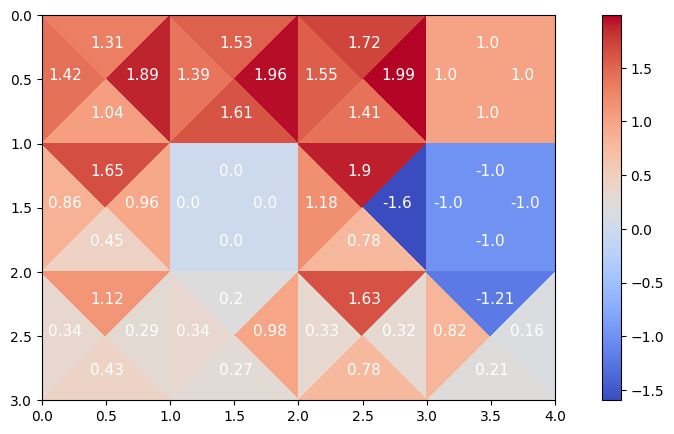

In [245]:
plot_action_value(action_value_grid)

**Laberinto de cuadros**

In [246]:
class fourrooms():
    def __init__(self, step_cost=-0.0, max_ep_length=400, es=True):
        self.grid = np.zeros((11,11))
        self.grid[0][2] = 1 
        self.grid[0][5] = 2
        self.grid[1][5] = 2
        self.grid[3][5] = 2
        self.grid[4][5] = 2
        self.grid[5][5] = 2
        self.grid[6][5] = 2
        self.grid[7][5] = 2
        self.grid[9][5] = 2
        self.grid[10][5] = 2
        self.grid[5][0] = 2
        self.grid[5][1] = 2
        self.grid[5][3] = 2
        self.grid[5][4] = 2
        self.grid[5][5] = 2
        self.grid[5][6] = 2
        self.grid[5][7] = 2
        self.grid[5][9] = 2
        self.grid[5][10] = 2
        self.exploring_starts = es
        self.goal_state = 2
        self.state = 106
        self.done = False
        self.max_ep_length=max_ep_length
        self.steps = 0
        self.step_cost = step_cost
        self.possible_actions = [0,1,2,3] # 0 = up, 1 = right, 2 = down, 3 = left
        self.action_space = 4
        self.coord_state_translation = {"[0, 0]":0, "[0, 1]":1, "[0, 2]":2, "[0, 3]":3,"[0, 4]":4,"[0, 5]":5,"[0, 6]":6,"[0, 7]":7,"[0, 8]":8,"[0, 9]":9,"[0, 10]":10,
                           "[1, 0]":11, "[1, 1]":12, "[1, 2]":13, "[1, 3]":14,"[1, 4]":15,"[1, 5]":16,"[1, 6]":17,"[1, 7]":18,"[1, 8]":19,"[1, 9]":20,"[1, 10]":21,
                           "[2, 0]":22, "[2, 1]":23, "[2, 2]":24, "[2, 3]":25,"[2, 4]":26,"[2, 5]":27,"[2, 6]":28,"[2, 7]":29,"[2, 8]":30,"[2, 9]":31,"[2, 10]":32,
                           "[3, 0]":33, "[3, 1]":34, "[3, 2]":35, "[3, 3]":36,"[3, 4]":37,"[3, 5]":38,"[3, 6]":39,"[3, 7]":40,"[3, 8]":41,"[3, 9]":42,"[3, 10]":43,
                           "[4, 0]":44, "[4, 1]":45, "[4, 2]":46, "[4, 3]":47,"[4, 4]":48,"[4, 5]":49,"[4, 6]":50,"[4, 7]":51,"[4, 8]":52,"[4, 9]":53,"[4, 10]":54,
                           "[5, 0]":55, "[5, 1]":56, "[5, 2]":57, "[5, 3]":58,"[5, 4]":59,"[5, 5]":60,"[5, 6]":61,"[5, 7]":62,"[5, 8]":63,"[5, 9]":64,"[5, 10]":65,
                           "[6, 0]":66, "[6, 1]":67, "[6, 2]":68, "[6, 3]":69,"[6, 4]":70,"[6, 5]":71,"[6, 6]":72,"[6, 7]":73,"[6, 8]":74,"[6, 9]":75,"[6, 10]":76,
                           "[7, 0]":77, "[7, 1]":78, "[7, 2]":79, "[7, 3]":80,"[7, 4]":81,"[7, 5]":82,"[7, 6]":83,"[7, 7]":84,"[7, 8]":85,"[7, 9]":86,"[7, 10]":87,
                           "[8, 0]":88, "[8, 1]":89, "[8, 2]":90, "[8, 3]":91,"[8, 4]":92,"[8, 5]":93,"[8, 6]":94,"[8, 7]":95,"[8, 8]":96,"[8, 9]":97,"[8, 10]":98,
                           "[9, 0]":99, "[9, 1]":100, "[9, 2]":101, "[9, 3]":102,"[9, 4]":103,"[9, 5]":104,"[9, 6]":105,"[9, 7]":106,"[9, 8]":107,"[9, 9]":108,"[9, 10]":109,
                           "[10, 0]":110, "[10, 1]":111, "[10, 2]":112, "[10, 3]":113,"[10, 4]":114,"[10, 5]":115,"[10, 6]":116,"[10, 7]":117,"[10, 8]":118,"[10, 9]":119,"[10, 10]":120}
                
        self.state_coord_translation = {"0":[0, 0], "1":[0, 1], "2":[0, 2], "3":[0, 3], "4":[0, 4], "5":[0, 5], "6":[0, 6], "7":[0, 7], "8":[0, 8], "9":[0, 9], "10":[0, 10],
                           "11": [1, 0], "12": [1, 1], "13":[1, 2], "14":[1, 3], "15":[1, 4], "16":[1, 5], "17":[1, 6], "18":[1, 7], "19":[1, 8], "20":[1, 9], "21":[1, 10],
                           "22":[2, 0], "23":[2, 1], "24":[2, 2], "25":[2, 3], "26":[2, 4], "27":[2, 5], "28":[2, 6], "29":[2, 7], "30":[2, 8], "31":[2, 9], "32":[2, 10],
                           "33":[3, 0], "34":[3, 1], "35":[3, 2], "36":[3, 3], "37":[3, 4], "38":[3, 5], "39":[3, 6], "40":[3, 7], "41":[3, 8], "42":[3, 9], "43":[3, 10],
                           "44":[4, 0], "45":[4, 1], "46":[4, 2], "47":[4, 3],"48":[4, 4],"49":[4, 5],"50":[4, 6],"51":[4, 7],"52":[4, 8],"53":[4, 9],"54":[4, 10],
                           "55":[5, 0], "56":[5, 1], "57":[5, 2], "58":[5, 3], "59":[5, 4], "60":[5, 5], "61":[5, 6], "62":[5, 7], "63":[5, 8], "64":[5, 9], "65":[5, 10],
                           "66":[6, 0], "67":[6, 1], "68":[6, 2], "69":[6, 3], "70":[6, 4], "71":[6, 5], "72":[6, 6], "73":[6, 7], "74":[6, 8], "75":[6, 9], "76":[6, 10],
                           "77":[7, 0], "78":[7, 1], "79":[7, 2], "80":[7, 3], "81":[7, 4], "82":[7, 5], "83":[7, 6], "84":[7, 7], "85":[7, 8], "86":[7, 9], "87":[7, 10],
                           "88":[8, 0], "89":[8, 1], "90":[8, 2], "91":[8, 3], "92":[8, 4], "93":[8, 5], "94":[8, 6], "95":[8, 7], "96":[8, 8], "97":[8, 9], "98":[8, 10],
                           "99":[9, 0], "100":[9, 1], "101":[9, 2], "102":[9, 3], "103":[9, 4], "104":[9, 5], "105":[9, 6], "106":[9, 7], "107":[9, 8], "108":[9, 9], "109":[9, 10],
                           "110":[10, 0], "111":[10, 1], "112":[10, 2], "113":[10, 3],"114":[10, 4],"115":[10, 5], "116":[10, 6], "117":[10, 7], "118":[10, 8], "119":[10, 9], "120":[10, 10]}
    
    def reset(self):
        self.done = False
        self.steps = 0
        self.grid = np.zeros((11,11))
        self.grid[0][3] = 1 
        self.grid[0][5] = 2
        self.grid[1][5] = 2
        self.grid[3][5] = 2
        self.grid[4][5] = 2
        self.grid[5][5] = 2
        self.grid[6][5] = 2
        self.grid[7][5] = 2
        self.grid[9][5] = 2
        self.grid[10][5] = 2
        self.grid[5][0] = 2
        self.grid[5][1] = 2
        self.grid[5][3] = 2
        self.grid[5][4] = 2
        self.grid[5][5] = 2
        self.grid[5][6] = 2
        self.grid[5][7] = 2
        self.grid[5][9] = 2
        self.grid[5][10] = 2

        if self.exploring_starts:
            self.state = np.random.choice([0,1,3,4,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,
                                           66,67,68,69,70,72,73,74,75,76,77,78,79,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,105,106,107,108,109,110,111,112,113,114,116,117,118,119,120])
        else:
            self.state = 106
        return self.state
    
    def get_next_state(self, current_position, action):
           
        next_state = self.state_coord_translation[str(current_position)].copy()     
        if action == 0 and next_state[0] != 0 and next_state != [6, 0] and next_state != [6, 1] and next_state != [6, 3] and next_state != [6, 4] and next_state != [6, 6] and next_state != [6, 7] and next_state != [6, 9] and next_state != [6, 10]:
            next_state[0] -= 1
        elif action == 1 and next_state[1] != 10 and next_state != [0, 4] and next_state != [1, 4] and  next_state != [3, 4] and next_state != [4, 4] and next_state != [6, 4] and next_state != [7, 4] and next_state != [9, 4] and next_state != [10, 4]:
            next_state[1] += 1
        elif action == 2 and next_state[0] != 10 and next_state != [4, 0] and next_state != [4, 1] and next_state != [4, 3] and next_state != [4, 4] and next_state != [4, 6] and next_state != [4, 7] and next_state != [4, 9] and next_state != [4, 10]:
            next_state[0] += 1
        elif action == 3 and next_state[1] != 0 and next_state != [0, 6] and next_state != [1, 6] and  next_state != [3, 6] and next_state != [4, 6] and next_state != [6, 6] and next_state != [7, 6] and next_state != [9, 6] and next_state != [10, 6]:
            next_state[1] -= 1
        else:
            pass 
        return self.coord_state_translation[str(next_state)]
            
    def step(self, action):
        assert action in self.possible_actions, "Action not in action space!"
        current_position = self.state
        next_state = self.get_next_state(current_position, action)        
        self.steps += 1
        
        if next_state == self.goal_state:
            reward = 1
            self.done = True
            
        else:
            reward = self.step_cost
        
        if self.steps == self.max_ep_length:
            self.done = True
            
        self.state = next_state
        return next_state, reward, self.done
    
def plot_state_value_grid(state_value_grid):
    plt.figure(figsize=(10,5))
    p=sns.heatmap(state_value_grid, cmap='coolwarm', annot=True, fmt=".1f",annot_kws={'size':16},square=True)
    p.set_ylim(len(state_value_grid)+0.01, -0.01)  
    
def plot_action_value(action_value_grid):
    top=action_value_grid[:,0].reshape((11,11))
    top_value_positions = [(0.38,0.25),(1.38,0.25),(2.38,0.25),(3.38,0.25),(4.38,0.25),(5.38,0.25),(6.38,0.25),(7.38,0.25),(8.38,0.25),(9.38,0.25),(10.38,0.25),
                           (0.38,1.25),(1.38,1.25),(2.38,1.25),(3.38,1.25),(4.38,1.25),(5.38,1.25),(6.38,1.25),(7.38,1.25),(8.38,1.25),(9.38,1.25),(10.38,1.25),
                           (0.38,2.25),(1.38,2.25),(2.38,2.25),(3.38,2.25),(4.38,2.25),(5.38,2.25),(6.38,2.25),(7.38,2.25),(8.38,2.25),(9.38,2.25),(10.38,2.25),
                           (0.38,3.25),(1.38,3.25),(2.38,3.25),(3.38,3.25),(4.38,3.25),(5.38,3.25),(6.38,3.25),(7.38,3.25),(8.38,3.25),(9.38,3.25),(10.38,3.25),
                           (0.38,4.25),(1.38,4.25),(2.38,4.25),(3.38,4.25),(4.38,4.25),(5.38,4.25),(6.38,4.25),(7.38,4.25),(8.38,4.25),(9.38,4.25),(10.38,4.25),
                           (0.38,5.25),(1.38,5.25),(2.38,5.25),(3.38,5.25),(4.38,5.25),(5.38,5.25),(6.38,5.25),(7.38,5.25),(8.38,5.25),(9.38,5.25),(10.38,5.25),
                           (0.38,6.25),(1.38,6.25),(2.38,6.25),(3.38,6.25),(4.38,6.25),(5.38,6.25),(6.38,6.25),(7.38,6.25),(8.38,6.25),(9.38,6.25),(10.38,6.25),
                           (0.38,7.25),(1.38,7.25),(2.38,7.25),(3.38,7.25),(4.38,7.25),(5.38,7.25),(6.38,7.25),(7.38,7.25),(8.38,7.25),(9.38,7.25),(10.38,7.25),
                           (0.38,8.25),(1.38,8.25),(2.38,8.25),(3.38,8.25),(4.38,8.25),(5.38,8.25),(6.38,8.25),(7.38,8.25),(8.38,8.25),(9.38,8.25),(10.38,8.25),
                           (0.38,9.25),(1.38,9.25),(2.38,9.25),(3.38,9.25),(4.38,9.25),(5.38,9.25),(6.38,9.25),(7.38,9.25),(8.38,9.25),(9.38,9.25),(10.38,9.25),
                           (0.38,10.25),(1.38,10.25),(2.38,10.25),(3.38,10.25),(4.38,10.25),(5.38,10.25),(6.38,10.25),(7.38,10.25),(8.38,10.25),(9.38,10.25),(10.38,10.25)]
    right=action_value_grid[:,1].reshape((11,11))
    right_value_positions = [(0.65,0.50),(1.65,0.50),(2.65,0.50),(3.65,0.50),(4.65,0.50),(5.65,0.50),(6.65,0.50),(7.65,0.50),(8.65,0.50),(9.65,0.50),(10.65,0.50),
                           (0.65,1.50),(1.65,1.50),(2.65,1.50),(3.65,1.50),(4.65,1.50),(5.65,1.50),(6.65,1.50),(7.65,1.50),(8.65,1.50),(9.65,1.50),(10.65,1.50),
                           (0.65,2.50),(1.65,2.50),(2.65,2.50),(3.65,2.50),(4.65,2.50),(5.65,2.50),(6.65,2.50),(7.65,2.50),(8.65,2.50),(9.65,2.50),(10.65,2.50),
                           (0.65,3.50),(1.65,3.50),(2.65,3.50),(3.65,3.50),(4.65,3.50),(5.65,3.50),(6.65,3.50),(7.65,3.50),(8.65,3.50),(9.65,3.50),(10.65,3.50),
                           (0.65,4.50),(1.65,4.50),(2.65,4.50),(3.65,4.50),(4.65,4.50),(5.65,4.50),(6.65,4.50),(7.65,4.50),(8.65,4.50),(9.65,4.50),(10.65,4.50),
                           (0.65,5.50),(1.65,5.50),(2.65,5.50),(3.65,5.50),(4.65,5.50),(5.65,5.50),(6.65,5.50),(7.65,5.50),(8.65,5.50),(9.65,5.50),(10.65,5.50),
                           (0.65,6.50),(1.65,6.50),(2.65,6.50),(3.65,6.50),(4.65,6.50),(5.65,6.50),(6.65,6.50),(7.65,6.50),(8.65,6.50),(9.65,6.50),(10.65,6.50),
                           (0.65,7.50),(1.65,7.50),(2.65,7.50),(3.65,7.50),(4.65,7.50),(5.65,7.50),(6.65,7.50),(7.65,7.50),(8.65,7.50),(9.65,7.50),(10.65,7.50),
                           (0.65,8.50),(1.65,8.50),(2.65,8.50),(3.65,8.50),(4.65,8.50),(5.65,8.50),(6.65,8.50),(7.65,8.50),(8.65,8.50),(9.65,8.50),(10.65,8.50),
                           (0.65,9.50),(1.65,9.50),(2.65,9.50),(3.65,9.50),(4.65,9.50),(5.65,9.50),(6.65,9.50),(7.65,9.50),(8.65,9.50),(9.65,9.50),(10.65,9.50),
                           (0.65,10.50),(1.65,10.50),(2.65,10.50),(3.65,10.50),(4.65,10.50),(5.65,10.50),(6.65,10.50),(7.65,10.50),(8.65,10.50),(9.65,10.50),(10.65,10.50)]
    bottom=action_value_grid[:,2].reshape((11,11))
    bottom_value_positions = [(0.38,0.80),(1.38,0.80),(2.38,0.80),(3.38,0.80),(4.38,0.80),(5.38,0.80),(6.38,0.80),(7.38,0.80),(8.38,0.80),(9.38,0.80),(10.38,0.80),
                           (0.38,1.80),(1.38,1.80),(2.38,1.80),(3.38,1.80),(4.38,1.80),(5.38,1.80),(6.38,1.80),(7.38,1.80),(8.38,1.80),(9.38,1.80),(10.38,1.80),
                           (0.38,2.80),(1.38,2.80),(2.38,2.80),(3.38,2.80),(4.38,2.80),(5.38,2.80),(6.38,2.80),(7.38,2.80),(8.38,2.80),(9.38,2.80),(10.38,2.80),
                           (0.38,3.80),(1.38,3.80),(2.38,3.80),(3.38,3.80),(4.38,3.80),(5.38,3.80),(6.38,3.80),(7.38,3.80),(8.38,3.80),(9.38,3.80),(10.38,3.80),
                           (0.38,4.80),(1.38,4.80),(2.38,4.80),(3.38,4.80),(4.38,4.80),(5.38,4.80),(6.38,4.80),(7.38,4.80),(8.38,4.80),(9.38,4.80),(10.38,4.80),
                           (0.38,5.80),(1.38,5.80),(2.38,5.80),(3.38,5.80),(4.38,5.80),(5.38,5.80),(6.38,5.80),(7.38,5.80),(8.38,5.80),(9.38,5.80),(10.38,5.80),
                           (0.38,6.80),(1.38,6.80),(2.38,6.80),(3.38,6.80),(4.38,6.80),(5.38,6.80),(6.38,6.80),(7.38,6.80),(8.38,6.80),(9.38,6.80),(10.38,6.80),
                           (0.38,7.80),(1.38,7.80),(2.38,7.80),(3.38,7.80),(4.38,7.80),(5.38,7.80),(6.38,7.80),(7.38,7.80),(8.38,7.80),(9.38,7.80),(10.38,7.80),
                           (0.38,8.80),(1.38,8.80),(2.38,8.80),(3.38,8.80),(4.38,8.80),(5.38,8.80),(6.38,8.80),(7.38,8.80),(8.38,8.80),(9.38,8.80),(10.38,8.80),
                           (0.38,9.80),(1.38,9.80),(2.38,9.80),(3.38,9.80),(4.38,9.80),(5.38,9.80),(6.38,9.80),(7.38,9.80),(8.38,9.80),(9.38,9.80),(10.38,9.80),
                           (0.38,10.80),(1.38,10.80),(2.38,10.80),(3.38,10.80),(4.38,10.80),(5.38,10.80),(6.38,10.80),(7.38,10.80),(8.38,10.80),(9.38,10.80),(10.38,10.80)]
    left=action_value_grid[:,3].reshape((11,11))
    left_value_positions = [(0.05,0.50),(1.05,0.50),(2.05,0.50),(3.05,0.50),(4.05,0.50),(5.05,0.50),(6.05,0.50),(7.05,0.50),(8.05,0.50),(9.05,0.50),(10.05,0.50),
                           (0.05,1.50),(1.05,1.50),(2.05,1.50),(3.05,1.50),(4.05,1.50),(5.05,1.50),(6.05,1.50),(7.05,1.50),(8.05,1.50),(9.05,1.50),(10.05,1.50),
                           (0.05,2.50),(1.05,2.50),(2.05,2.50),(3.05,2.50),(4.05,2.50),(5.05,2.50),(6.05,2.50),(7.05,2.50),(8.05,2.50),(9.05,2.50),(10.05,2.50),
                           (0.05,3.50),(1.05,3.50),(2.05,3.50),(3.05,3.50),(4.05,3.50),(5.05,3.50),(6.05,3.50),(7.05,3.50),(8.05,3.50),(9.05,3.50),(10.05,3.50),
                           (0.05,4.50),(1.05,4.50),(2.05,4.50),(3.05,4.50),(4.05,4.50),(5.05,4.50),(6.05,4.50),(7.05,4.50),(8.05,4.50),(9.05,4.50),(10.05,4.50),
                           (0.05,5.50),(1.05,5.50),(2.05,5.50),(3.05,5.50),(4.05,5.50),(5.05,5.50),(6.05,5.50),(7.05,5.50),(8.05,5.50),(9.05,5.50),(10.05,5.50),
                           (0.05,6.50),(1.05,6.50),(2.05,6.50),(3.05,6.50),(4.05,6.50),(5.05,6.50),(6.05,6.50),(7.05,6.50),(8.05,6.50),(9.05,6.50),(10.05,6.50),
                           (0.05,7.50),(1.05,7.50),(2.05,7.50),(3.05,7.50),(4.05,7.50),(5.05,7.50),(6.05,7.50),(7.05,7.50),(8.05,7.50),(9.05,7.50),(10.05,7.50),
                           (0.05,8.50),(1.05,8.50),(2.05,8.50),(3.05,8.50),(4.05,8.50),(5.05,8.50),(6.05,8.50),(7.05,8.50),(8.05,8.50),(9.05,8.50),(10.05,8.50),
                           (0.05,9.50),(1.05,9.50),(2.05,9.50),(3.05,9.50),(4.05,9.50),(5.05,9.50),(6.05,9.50),(7.05,9.50),(8.05,9.50),(9.05,9.50),(10.05,9.50),
                           (0.05,10.50),(1.05,10.50),(2.05,10.50),(3.05,10.50),(4.05,10.50),(5.05,10.50),(6.05,10.50),(7.05,10.50),(8.05,10.50),(9.05,10.50),(10.05,10.50)]

    fig, ax=plt.subplots(figsize=(12,5))
    ax.set_ylim(11, 0)
    tripcolor = quatromatrix(left, top, right, bottom, ax=ax,
                 triplotkw={"color":"k", "lw":1},
                 tripcolorkw={"cmap": "coolwarm"}) 

    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor)

    for i, (xi,yi) in enumerate(top_value_positions):
        plt.text(xi,yi,round(top.flatten()[i],2), size=11, color="w")
    for i, (xi,yi) in enumerate(right_value_positions):
        plt.text(xi,yi,round(right.flatten()[i],2), size=11, color="w")
    for i, (xi,yi) in enumerate(left_value_positions):
        plt.text(xi,yi,round(left.flatten()[i],2), size=11, color="w")
    for i, (xi,yi) in enumerate(bottom_value_positions):
        plt.text(xi,yi,round(bottom.flatten()[i],2), size=11, color="w")

    plt.show()
    
    
def quatromatrix(left, bottom, right, top, ax=None, triplotkw={},tripcolorkw={}):
    if not ax: ax=plt.gca()
    n = left.shape[0]; m=left.shape[1]
    a = np.array([[0,0],[0,1],[.5,.5],[1,0],[1,1]])
    tr = np.array([[0,1,2], [0,2,3],[2,3,4],[1,2,4]])

    A = np.zeros((n*m*5,2))
    Tr = np.zeros((n*m*4,3))

    for i in range(n):
        for j in range(m):
            k = i*m+j
            A[k*5:(k+1)*5,:] = np.c_[a[:,0]+j, a[:,1]+i]
            Tr[k*4:(k+1)*4,:] = tr + k*5

    C = np.c_[ left.flatten(), bottom.flatten(), 
              right.flatten(), top.flatten()   ].flatten()

    triplot = ax.triplot(A[:,0], A[:,1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:,0], A[:,1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor

In [247]:
max_episodes = 5000
env = fourrooms(step_cost=-0.0,max_ep_length=100)
action_value_grid = np.zeros((121,4))
action_value_grid[2] = 1
g = 0.99 
alpha = 0.01 

In [248]:
def get_action(q_values, epsilon):
    if random.random() > epsilon:
        return np.argmax(q_values)
    else:
        return random.randint(0,3)

In [249]:
for ep in range(max_episodes):
    iterator = 1
    state = env.reset()
    while True: 
        action = get_action(action_value_grid[state], 1*0.95**iterator)
        next_state, reward, done = env.step(action)
        action_value_grid[state][action] += alpha*(reward + g*max(action_value_grid[next_state]) - action_value_grid[state][action])
        iterator += 1
        state = next_state
        if done:
            break

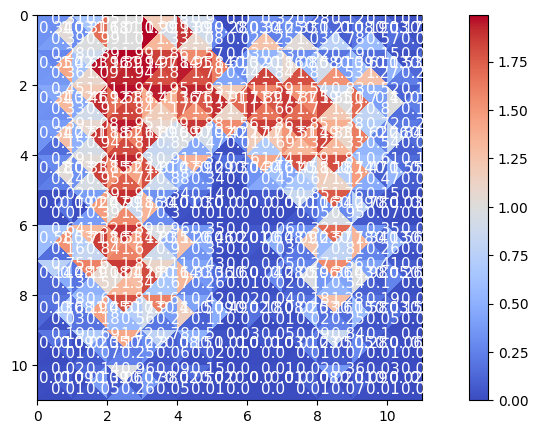

In [250]:
plot_action_value(action_value_grid)

**Taxi problem**

In [251]:
!pip install gym
!pip install pygame
import gym
import pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
env = gym.make("Taxi-v3")

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [253]:
state_space = env.observation_space.n
action_space = env.action_space.n
Q = np.zeros((state_space, action_space))

In [254]:
total_episodes = 2500        
total_test_episodes = 10      
max_steps = 200               
learning_rate = 0.01         
gamma = 0.99                  
epsilon = 1.0                
max_epsilon = 1.0             
min_epsilon = 0.001           
decay_rate = 0.01            

In [255]:
def epsilon_greedy_policy(Q, state):
  if(random.uniform(0,1) > epsilon):
    action = np.argmax(Q[state])
  else:
    action = env.action_space.sample()
  return action

In [236]:
 penalties_per_episode = []
 sucess_dropoff_per_episode = []

 for episode in range(total_episodes):
    state = env.reset()
    step = 0
    penalties = 0
    dropoffs = 0
    done = False
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    for step in range(max_steps):
        action = epsilon_greedy_policy(Q, state)
        new_state, reward, done, info = env.step(action)
        if reward == -10:
            penalties += 1
        if reward == 20:
            reward = 5
            dropoffs += 1
            
        Q[state][action] = Q[state][action] + learning_rate * (reward + gamma * 
                                    np.max(Q[new_state]) - Q[state][action])      
        if done == True: 
            break
        state = new_state
    penalties_per_episode.append(penalties)
    sucess_dropoff_per_episode.append(dropoffs)

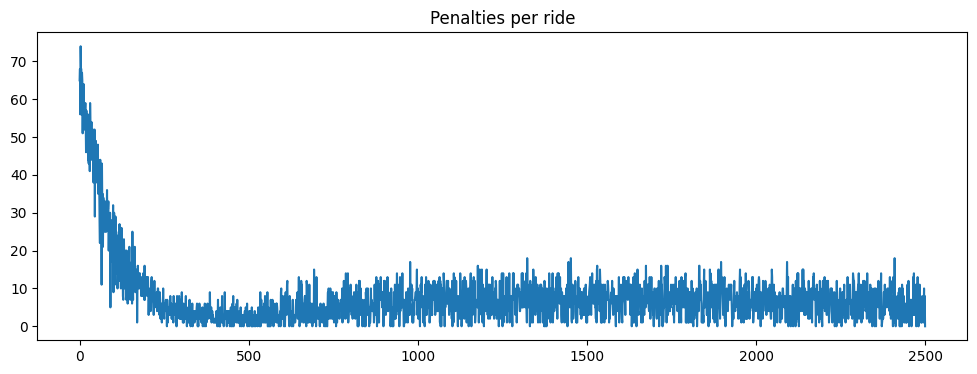

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind='line')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


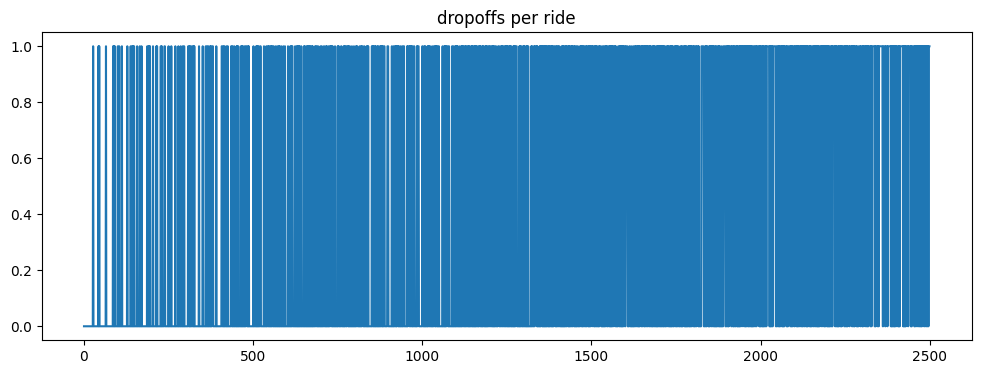

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("dropoffs per ride")    
pd.Series(sucess_dropoff_per_episode).plot(kind='line')
plt.show()

In [239]:
Q

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.30714138, -2.31186887, -2.31538977, -2.31169234, -2.31141406,
        -2.39320629],
       [-2.0723643 , -2.0781082 , -2.07597672, -2.07727544, -2.0749407 ,
        -2.0762407 ],
       ...,
       [-1.04320499, -1.04137303, -1.04134296, -1.05172875, -1.09190617,
        -1.09058675],
       [-2.37086706, -2.37850087, -2.37153958, -2.38017153, -2.39400471,
        -2.39552005],
       [-0.04979304, -0.0510474 , -0.04979304,  0.07945212, -0.58558861,
        -0.199099  ]])